In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATADIR = Path("../data")
list(DATADIR.glob("*"))

[PosixPath('../data/gender_submission.csv'),
 PosixPath('../data/train.csv'),
 PosixPath('../data/.gitignore'),
 PosixPath('../data/test.csv')]

In [3]:
train_df = pd.read_csv(DATADIR / "train.csv")
test_df = pd.read_csv(DATADIR / "test.csv")
all_df = pd.concat([train_df, test_df])

print("** train.csv **")
print(train_df.info())

print("** test.csv **")
print(train_df.info())

** train.csv **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
** test.csv **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8

- Number of NaNs

In [4]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Survived

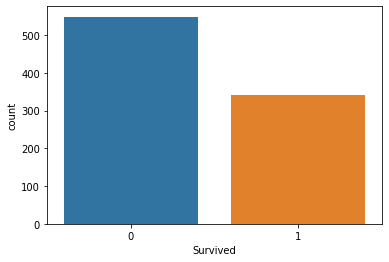

In [5]:
sns.countplot(train_df['Survived'])
plt.show()

### Pclass

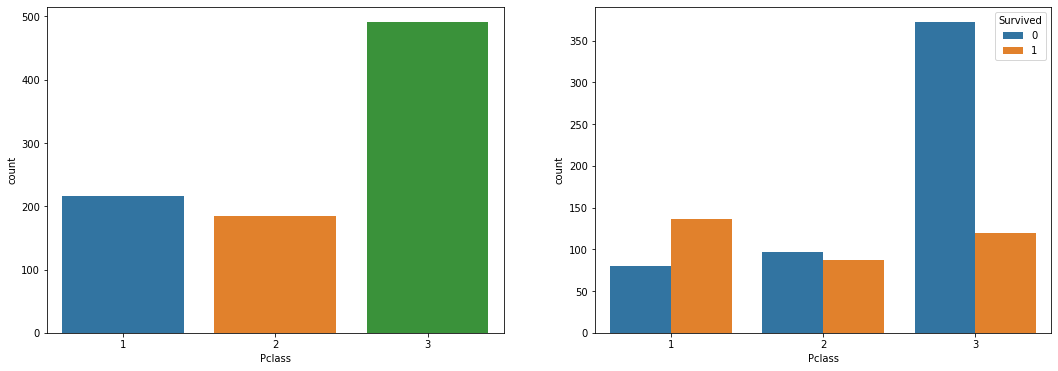

In [6]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['Pclass'])

plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_df)

plt.show()

### Sex

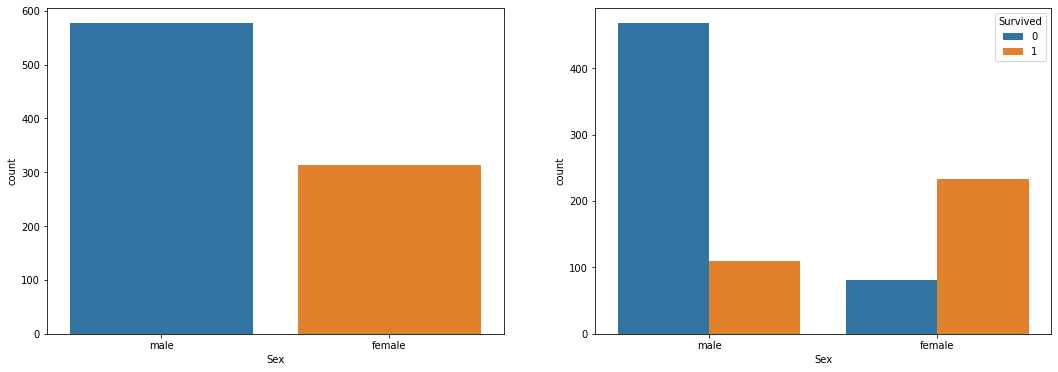

In [7]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['Sex'])

plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=train_df)

plt.show()

### Age

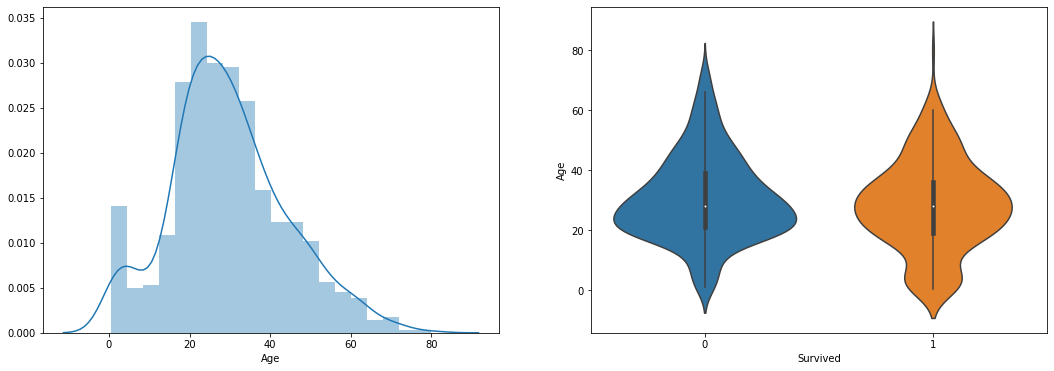

In [8]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.distplot(train_df['Age'].dropna())

plt.subplot(1, 2, 2)
sns.violinplot(x='Survived', y='Age', data=train_df)

plt.show()

binning

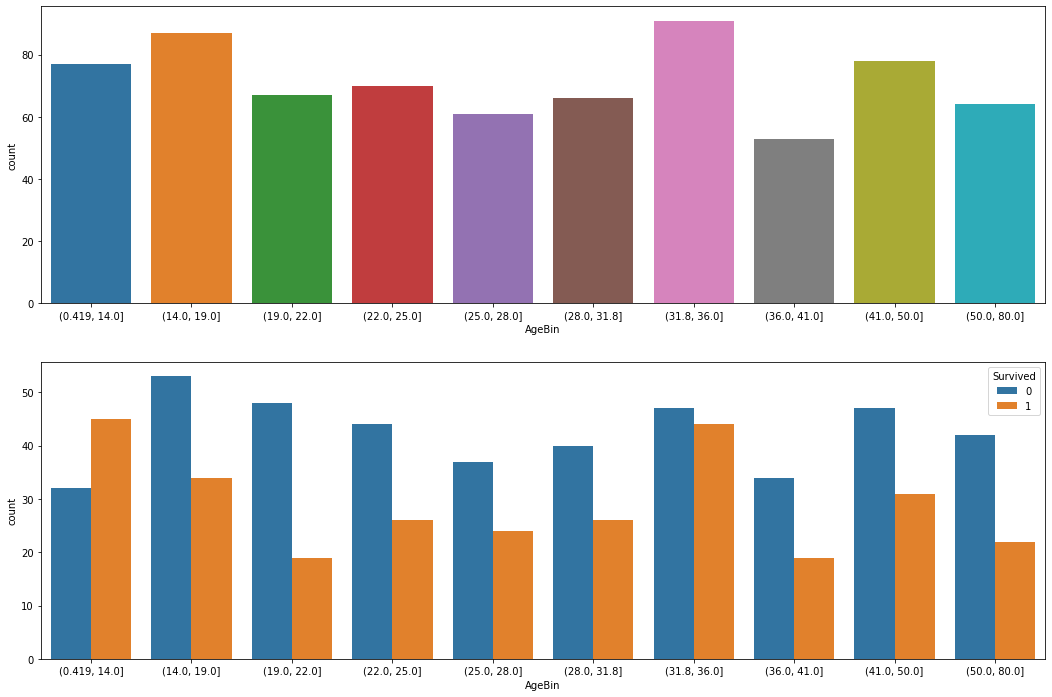

In [9]:
train_df["AgeBin"] = pd.qcut(train_df["Age"], 10)

plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
sns.countplot(x='AgeBin', data=train_df)
plt.subplot(2, 1, 2)
sns.countplot(x='AgeBin', hue='Survived', data=train_df)
plt.show()

### Family size

#### Sibsp: Number of brothers/sisters or spouses in the ship

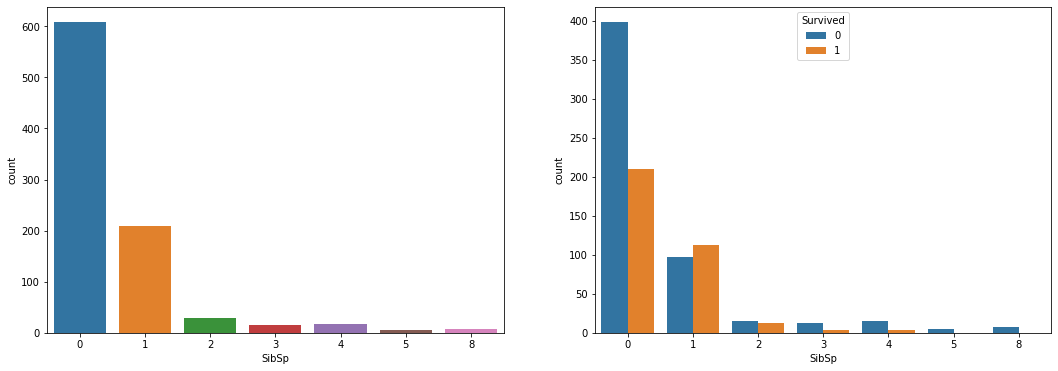

In [10]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['SibSp'].dropna())

plt.subplot(1, 2, 2)
sns.countplot(x='SibSp', hue='Survived', data=train_df)

plt.show()

#### Parch: Number of parents or children in the ship

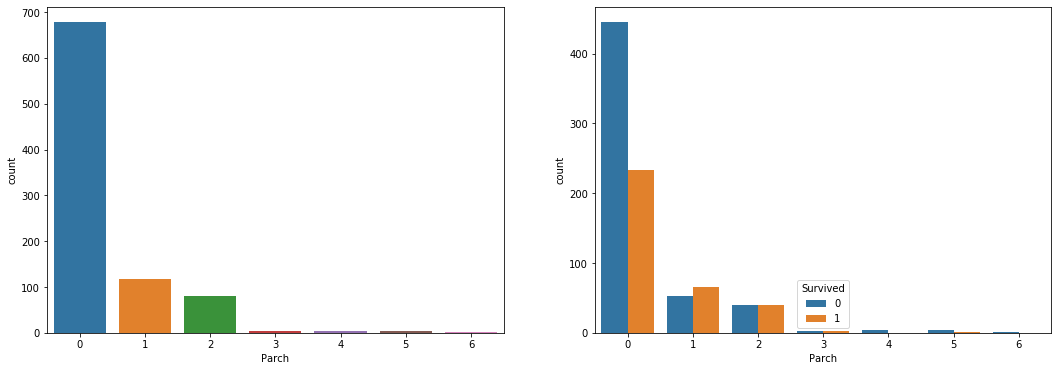

In [11]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['Parch'].dropna())

plt.subplot(1, 2, 2)
sns.countplot(x='Parch', hue='Survived', data=train_df)

plt.show()

#### Family size: `ShibSp` + `Parch` + 1

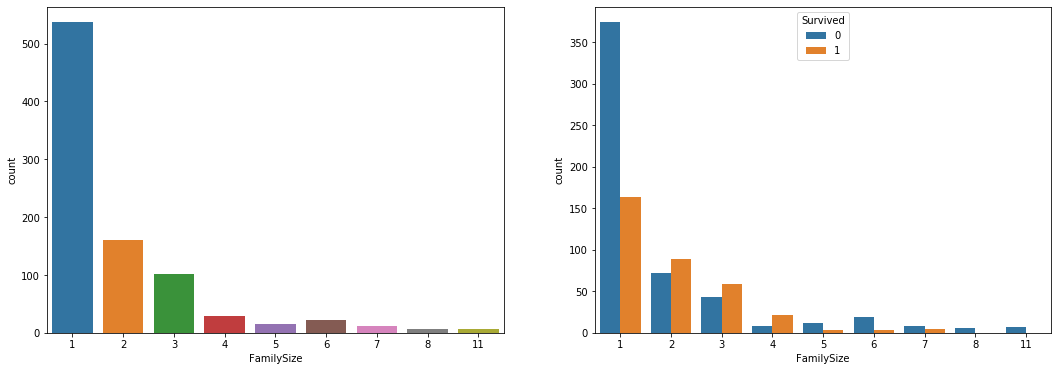

In [12]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['FamilySize'].dropna())

plt.subplot(1, 2, 2)
sns.countplot(x='FamilySize', hue='Survived', data=train_df)

plt.show()

### Ticket

In [13]:
train_df['Ticket'].unique()[:10]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

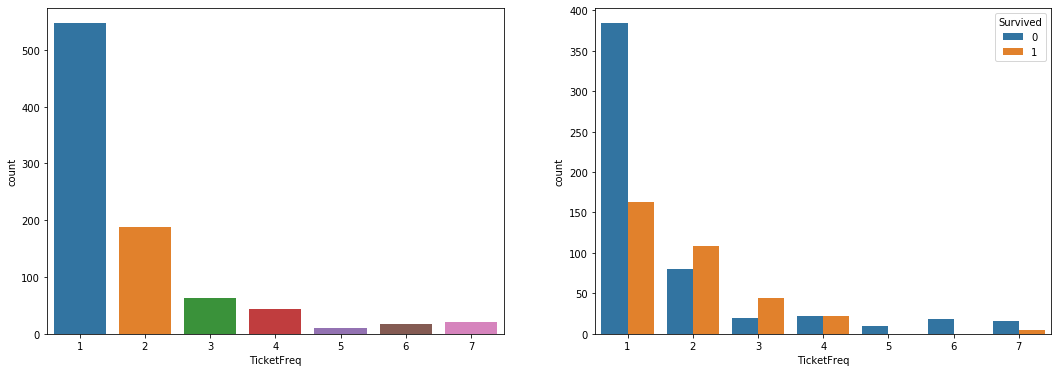

In [14]:
train_df["TicketFreq"] = train_df.groupby('Ticket')['Ticket'].transform('count')

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['TicketFreq'].dropna())

plt.subplot(1, 2, 2)
sns.countplot(x='TicketFreq', hue='Survived', data=train_df)

plt.show()

### Fare

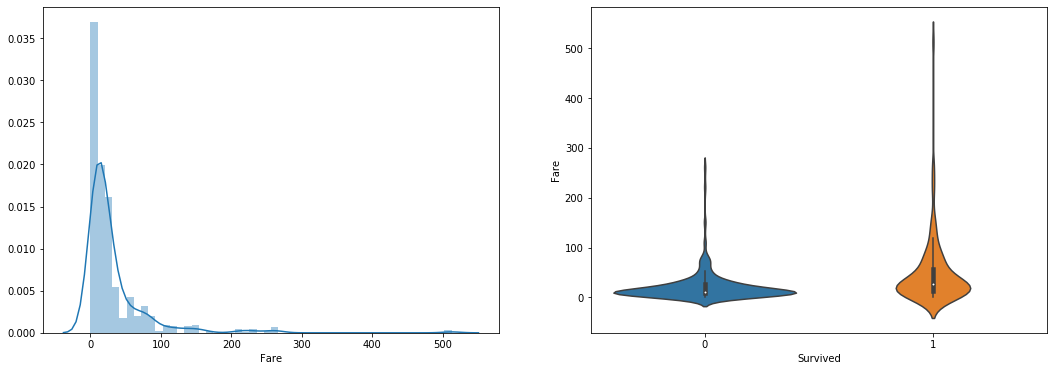

In [15]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.distplot(train_df['Fare'].dropna())

plt.subplot(1, 2, 2)
sns.violinplot(x='Survived', y='Fare', data=train_df)

plt.show()

binning

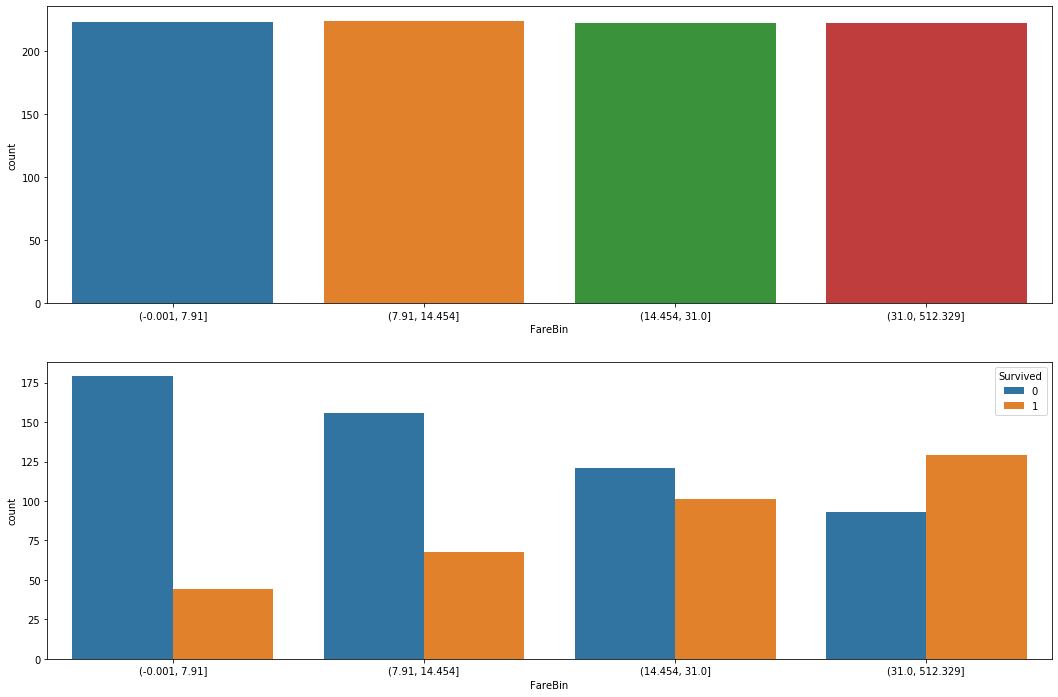

In [16]:
train_df["FareBin"] = pd.qcut(train_df["Fare"], 4)

plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
sns.countplot(x='FareBin', data=train_df)
plt.subplot(2, 1, 2)
sns.countplot(x='FareBin', hue='Survived', data=train_df)
plt.show()

### Cabin

- too many NaNs

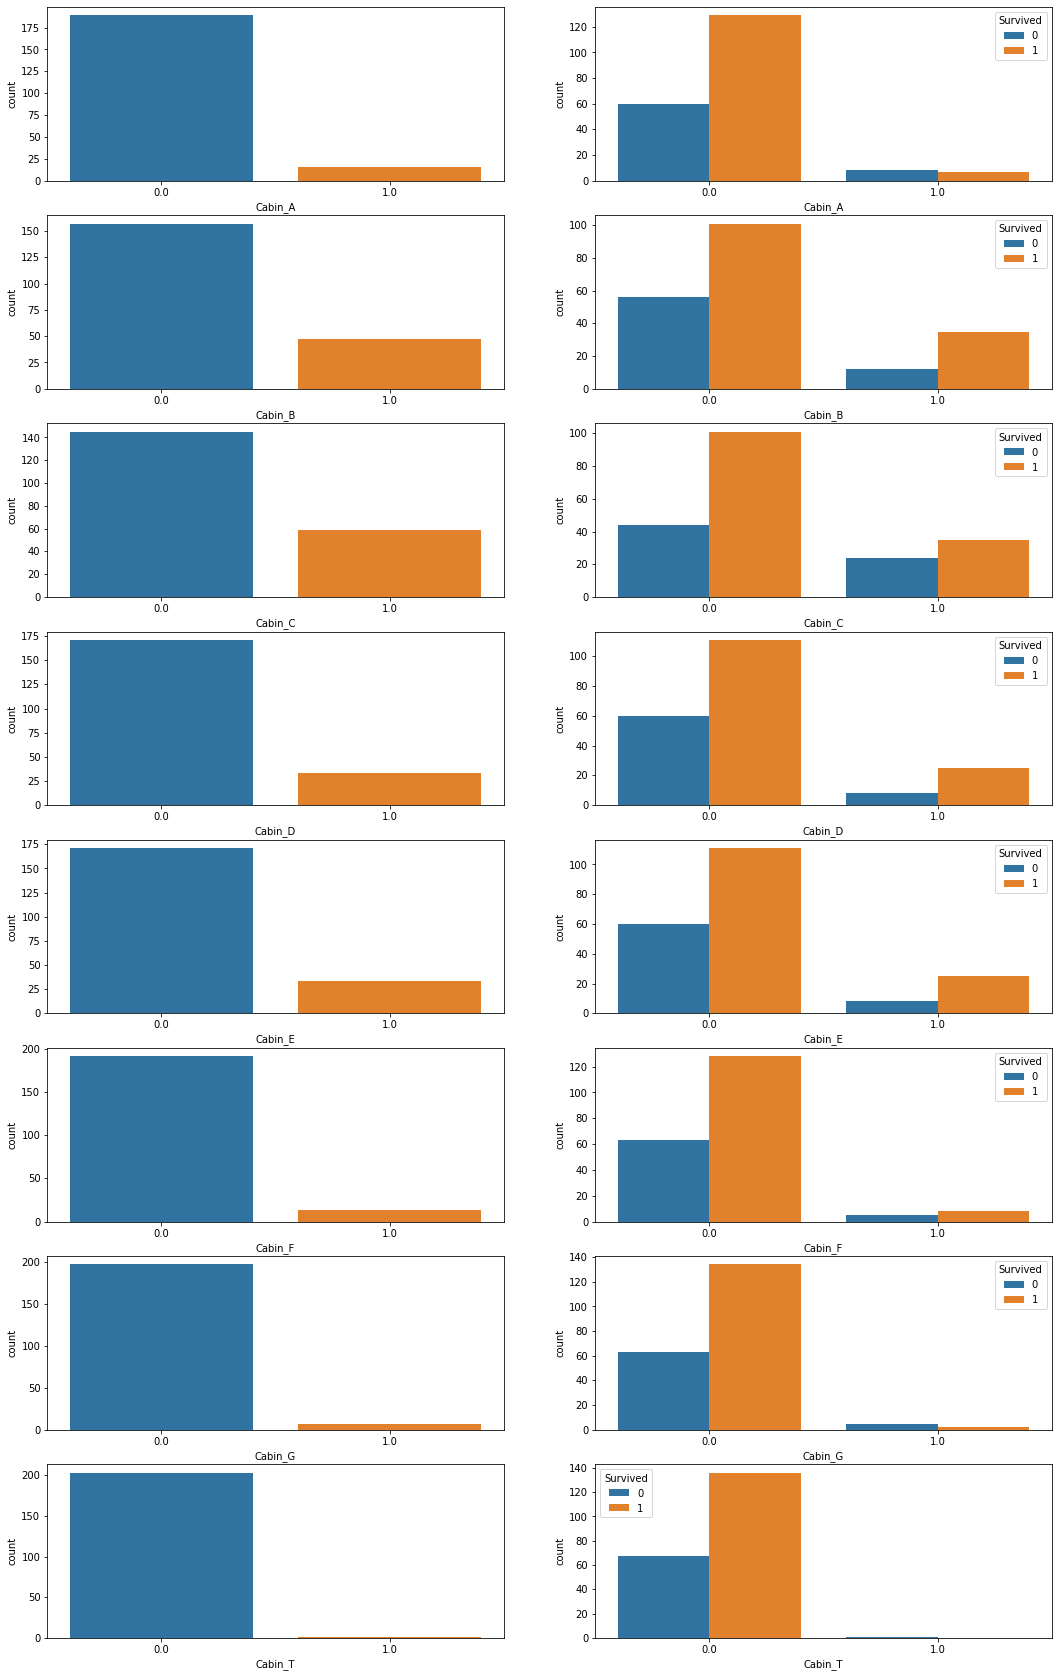

In [17]:
cabin_categories = set(
    c[0]
    for cb in train_df['Cabin'].dropna().unique()
    for c in cb.split()
)

for c in cabin_categories:
    train_df['Cabin_' + c] = train_df['Cabin'].apply(
        lambda x: (1 if c in x else 0) if type(x) == str else x
    )


plt.figure(figsize=(18, 30))

for i, c in enumerate(sorted(cabin_categories)):
    plt.subplot(len(cabin_categories), 2, 2 * i + 1)
    sns.countplot(train_df['Cabin_'+c].dropna())

    plt.subplot(len(cabin_categories), 2, 2 * i + 2)
    sns.countplot(x='Cabin_'+c, hue='Survived', data=train_df)

plt.show()

### Deck

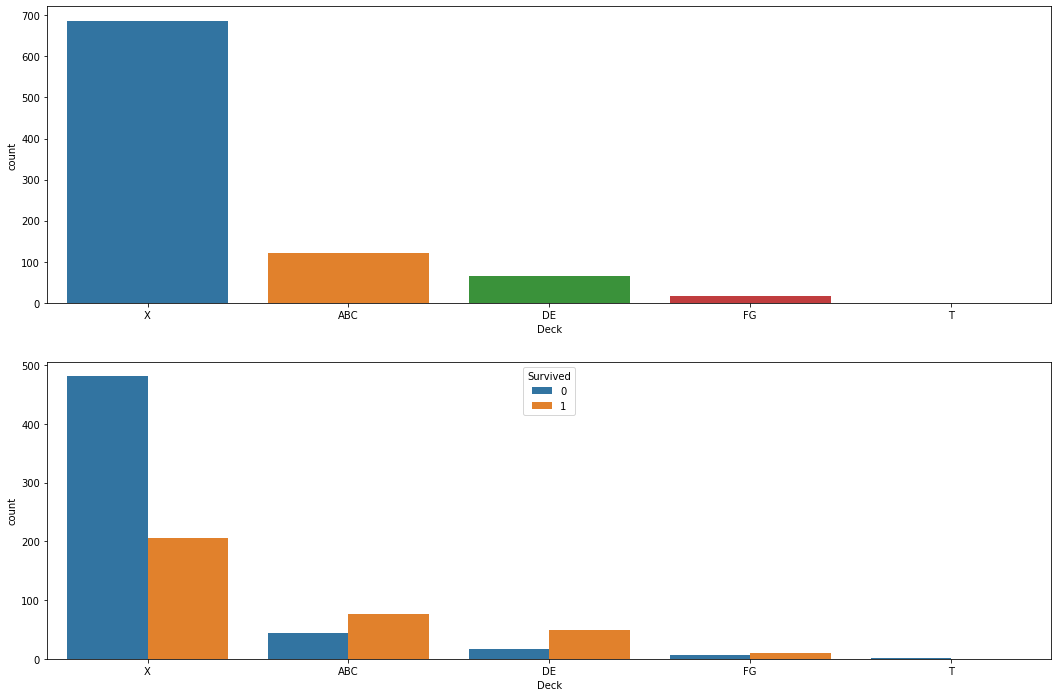

In [18]:
train_df["Deck"] = train_df["Cabin"].apply(lambda x: x[0] if isinstance(x, str) else "X")
train_df['Deck'] = train_df['Deck'].replace(['A', 'B', 'C'], 'ABC')
train_df['Deck'] = train_df['Deck'].replace(['D', 'E'], 'DE')
train_df['Deck'] = train_df['Deck'].replace(['F', 'G'], 'FG')

plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
sns.countplot(x='Deck', data=train_df)
plt.subplot(2, 1, 2)
sns.countplot(x='Deck', hue='Survived', data=train_df)
plt.show()

### Embarked

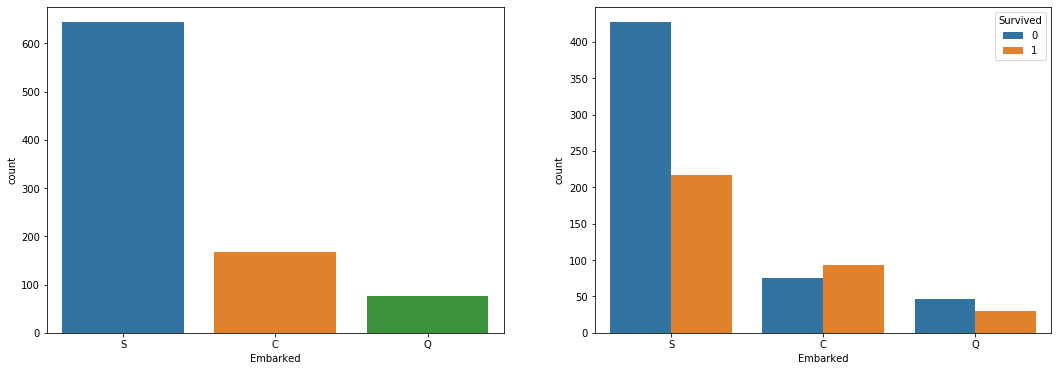

In [19]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['Embarked'].dropna())

plt.subplot(1, 2, 2)
sns.countplot(x='Embarked', hue='Survived', data=train_df)

plt.show()

### Title

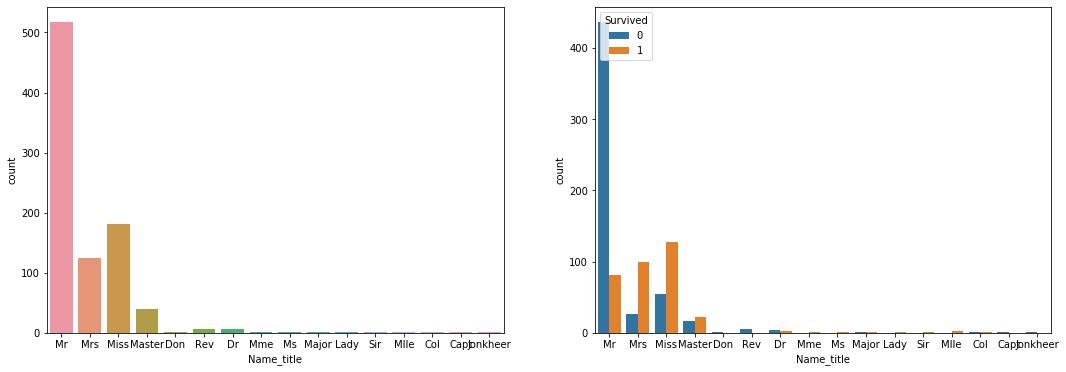

In [20]:
import re

train_df['Name_title'] = train_df['Name'].apply(lambda x: re.findall(r', (\w+)\.', x))
train_df['Name_title'] = train_df['Name_title'].apply(lambda x: np.NaN if len(x) < 1 else x[0])

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.countplot(train_df['Name_title'].dropna())

plt.subplot(1, 2, 2)
sns.countplot(x='Name_title', hue='Survived', data=train_df)

plt.show()